# Simple Linear Regression assignment 
# 2. Salary Hike

Problem:
Salary_hike -> Build a prediction model for Salary_hike


First we'll import all the required libaries, which includes pandas, numpy, matplotlib, and seaborn. Then we'll set %matplotlib inline and we'll import rest of the sklearn stuff later

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we will fetch the data from the csv file and check information and description of the data 

In [2]:
dsal = pd.read_csv('Salary_Data.csv')

In [3]:
dsal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dsal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
dsal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Exploratory Data Analysis
Let's explore the data!

In [6]:
sns.set_style('whitegrid')

We will use seaborn to create a jointplot to compare the YearsExperience and salary

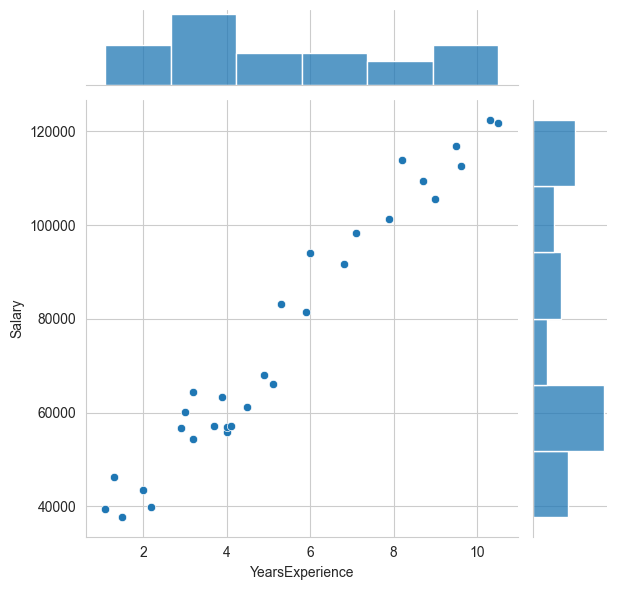

In [7]:
sns.jointplot(x = 'YearsExperience', y = 'Salary', data = dsal)

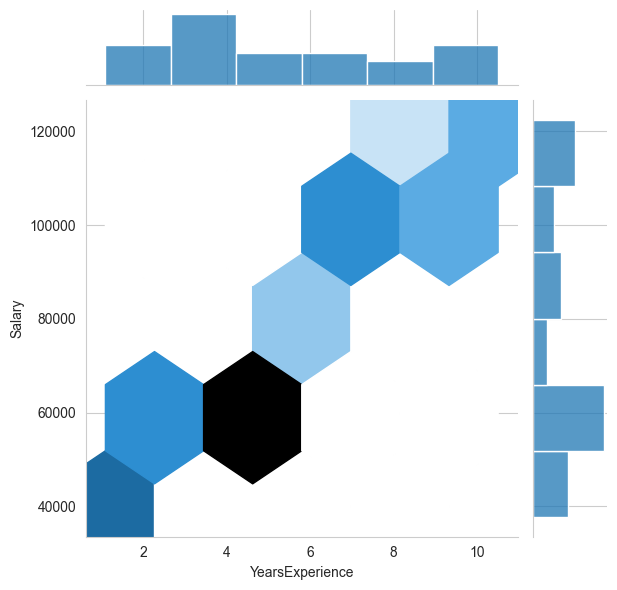

In [8]:
sns.jointplot(x = 'YearsExperience', y = 'Salary', data = dsal, kind = 'hex')

It seems to have a linear relation between them. As the value of x, which is YearsExperience is increasing, the value of y, that is, Salary is also increasing.
Also, from the 2D hex plotting we can see that, Salary has more frequency around the 4 to 6 years of expierence.


Now, we will try to look more closely to better understand the correlation between the two columns, using pairplot and heatmap.

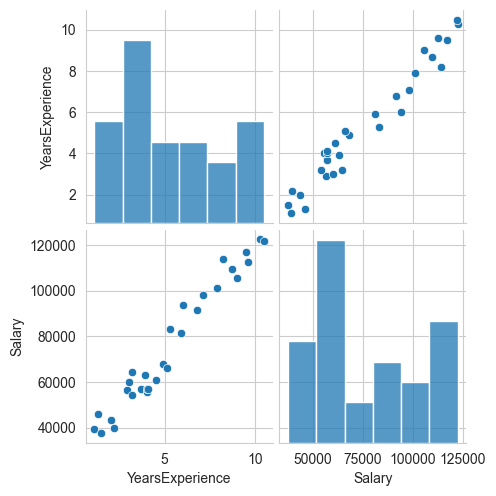

In [9]:
sns.pairplot(dsal)

We can see here that sorting time and delivery time are very correlated with each other, so that they are forming a linear relation between them.

<Axes: >

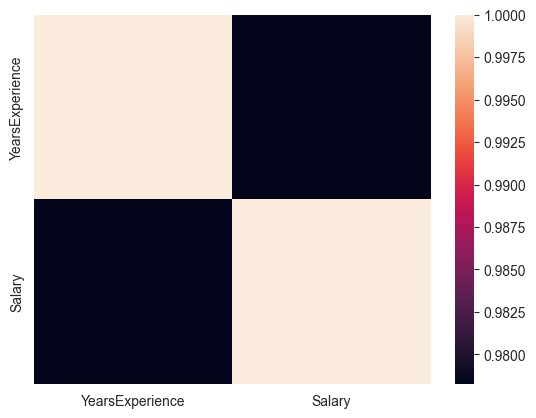

In [10]:
sns.heatmap(dsal.corr(numeric_only = True))

Here, from the heatmap we can see that the two columns are around 98% correlated, which is a good criteria for forming predictive model based on them.

In [11]:
dsal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


So, the actual correlation value is 0.978 (approx)

Now we'll create a linear model plot using seaborn's lmplot of YearsExperience vs Salary

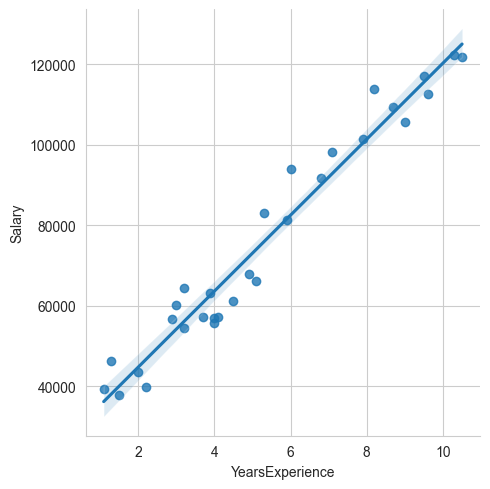

In [12]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = dsal)

<Axes: >

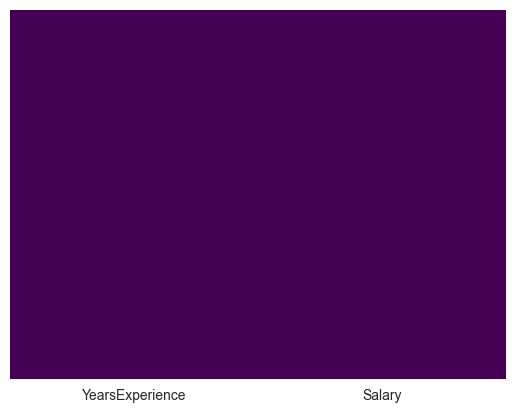

In [13]:
sns.heatmap(dsal.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
dsal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There is no missing value in the data set, so we are ready to go!

# Now we'll create our model

Before that we would set a variable X equal to the YearsExperience and y equal to the Salary. 
So, we'd have y = f(X) type of formation.

In [15]:
X = pd.DataFrame(dsal['YearsExperience'])
y = dsal['Salary']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
dtypes: float64(1)
memory usage: 372.0 bytes


In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 372.0 bytes


# Training and Testing data
Now, we'll take our data and split it into two set, training and testing data.

We would use model_selection.train_test_split from sklearn to split the data into training and testing data. By default training set would have 75% data. 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# Training the Model
Now it is time to train our model on our training data!
So, we'd import LinearRegression from sklearn.linear_model

In [19]:
from sklearn.linear_model import LinearRegression

Now, we would create a LinearRegression model named lm

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Coefficient: \n', lm.coef_)

Coefficient: 
 [9412.64272211]


# Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [23]:
predictions = lm.predict(X_test)

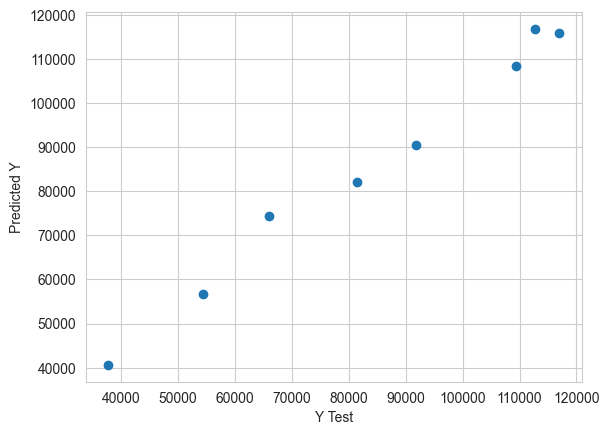

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Evaluation of the model

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2717.9136363764037
MSE: 13336016.519261394
RMSE: 3651.8511085833434


# Residuals

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7148\1812712679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins = 10)


<Axes: xlabel='Salary', ylabel='Density'>

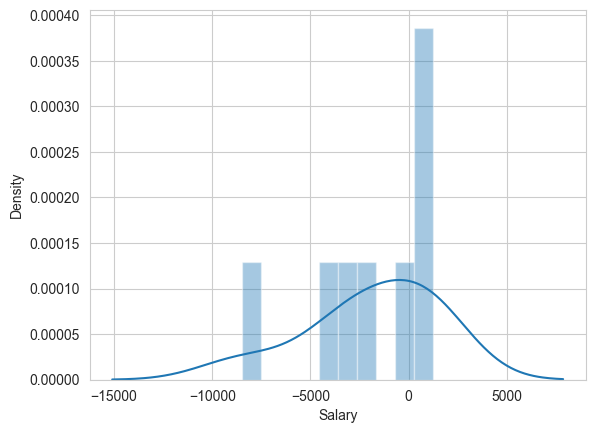

In [26]:
sns.distplot((y_test-predictions), bins = 10)

# Conclusion

In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
YearsExperience,9412.642722


Because there is only 1 feature, so here 1 unit increase in YearsExperience is associated with 9412.64 unit increase in Salary

In [28]:
lm.score(X_test, y_test)  

0.9820915410004406

Also, the model is 98% accurate

# Alternate model

In [29]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):                    2.56e-24
Time:                        07:39:03   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lm.predict([[8]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101793.39991404])

In [32]:
model.predict([[8]])

array([106039.50763535])

# Trasformational model: log

In [33]:
X_log = np.log(X)
X_log.head()

,YearsExperience
0,0.095310
1,0.262364
2,0.405465
3,0.693147
4,0.788457


In [34]:
y_log = np.log(y)
y_log.head()

0    10.580073
1    10.740843
2    10.538237
3    10.681091
4    10.593906
Name: Salary, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, random_state=101)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
pred = model.predict(X_test)

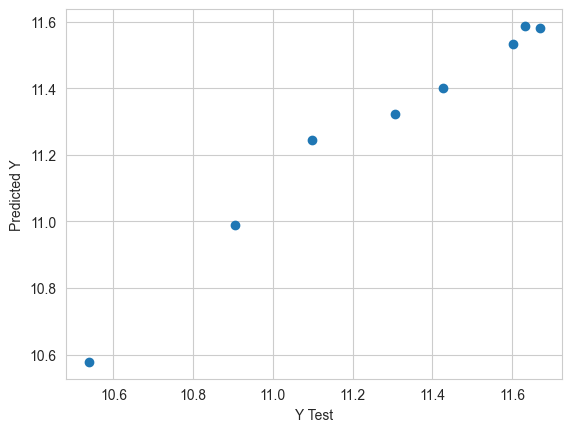

In [39]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0643181598734226
MSE: 0.005682576939111968
RMSE: 0.07538286900292379


In [41]:
model.score(X_test, y_test)

0.959621418537888

Therefore, performance improved for log transformation. Error is also very low.


# Transformational model: Square

In [42]:
X_sq = np.square(X)
X_sq.head()

,YearsExperience
0,1.21
1,1.69
2,2.25
3,4.00
4,4.84


In [43]:
y_sq = np.square(y)
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_sq, y_sq, random_state=101)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
pred = model.predict(X_test)

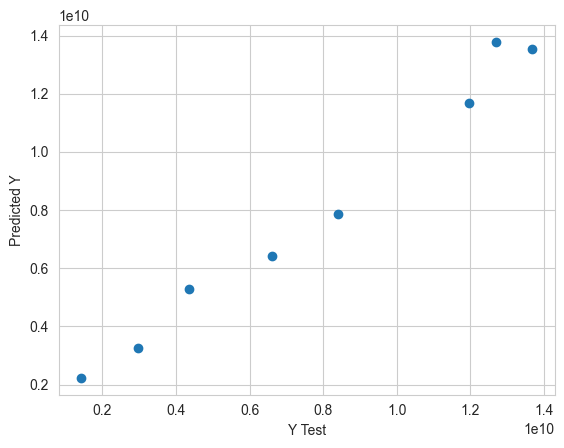

In [48]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 538798081.5335274
MSE: 4.030161559943529e+17
RMSE: 634835534.6027449


In [50]:
model.score(X_test, y_test)

0.9790021748972408

# transformational  model: Sqrt

In [52]:
X_sqrt = np.sqrt(X)
X_sq.head()

,YearsExperience
0,1.21
1,1.69
2,2.25
3,4.00
4,4.84


In [53]:
y_sqrt = np.sqrt(y)
y_sqrt.head()

0    198.350700
1    214.953483
2    194.244691
3    208.626460
4    199.727314
Name: Salary, dtype: float64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_sqrt, y_sqrt, random_state=101)

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
pred = model.predict(X_test)

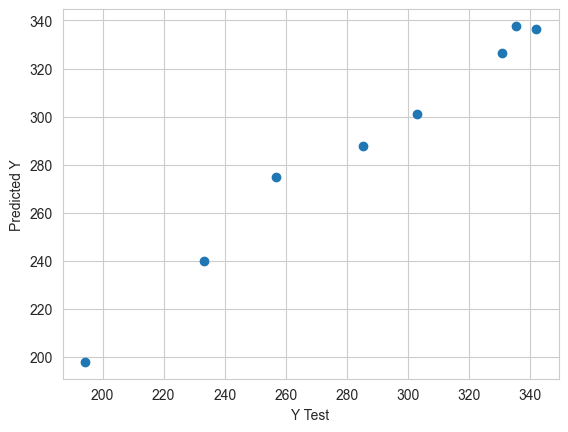

In [58]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5.564600093663117
MSE: 55.80847142605528
RMSE: 7.4705067717026585


In [60]:
model.score(X_test, y_test)

0.9775881363696787

So, for this dataset transformational models were of emmence importance, we were able to increase the accuracy using each one of them. 